1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
import pickle

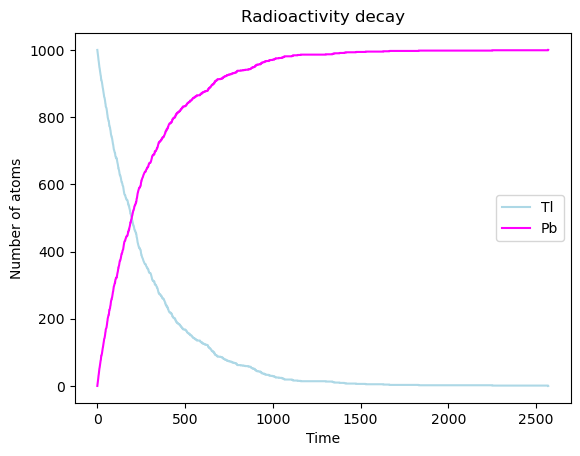

In [7]:
def probability(x):
    return 1-2**(-x/life)
life = 3.052*60

atoms_Tl = 1000
atoms_Pb = 0

evol_Tl = np.array([atoms_Tl])
evol_Pb = np.array([0])
ts = 1
prob_decay = probability(ts)
while atoms_Tl > 0:
    for i in range(atoms_Tl):
        if np.random.uniform(0,1) <= prob_decay:
            atoms_Tl = atoms_Tl-1
            atoms_Pb = atoms_Pb+1
    evol_Tl = np.append(evol_Tl, atoms_Tl)
    evol_Pb = np.append(evol_Pb, atoms_Pb)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(evol_Tl, label='Tl', c='lightblue')
ax.plot(evol_Pb, label='Pb',c='magenta')
ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
ax.set_title("Radioactivity decay", verticalalignment='bottom')
ax.legend()

In [ ]:
x_d = np.linspace(0,len(evol_Tl),len(evol_Tl),endpoint=False)
y_d = np.exp2(-x_d/life)
plt.plot(x_d, y_d, label='Ti')
z_d = 1-np.exp2(-x_d/life) 
plt.plot(x_d, z_d, label='Pb')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Probability')
plt.title('Thallium decay in Lead (Probability Law)')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

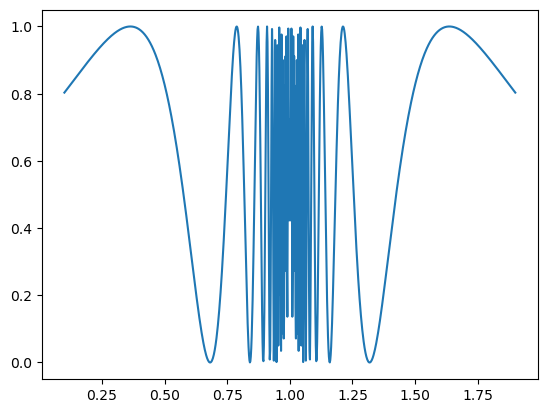

Integral in [0,2] with Hit/Miss method:  1.2127733758822759
Integral in [0,2] with Mean Value method:  1.2130018356848067


In [8]:
def f(x):
    return np.sin(1/(1-x))**2
x_val = np.linspace(0.1,1.9,1000)
y_val= f(x_val)

plt.plot(x_val,y_val)
plt.show()

a = (x_val.max()-x_val.min())*(y_val.max()-y_val.min())
sp = np.random.rand(1000000,2)*(2,1)
res = sp[sp[:,1] < f(sp[:,0])]
print('Integral in [0,2] with Hit/Miss method: ', len(res)/len(sp) * a)

spmv = np.random.rand(1000000)
avg = np.average(f(spmv))
err_integral = (x_val.max()-x_val.min()) * np.sqrt(f(spmv))
print('Integral in [0,2] with Mean Value method: ', (x_val.max()-x_val.min()) * avg)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [15]:
def volume(dim,N):
    V = 2**dim
    count = 0
    for i in range(N):
        x = (2*np.random.uniform(size=dim))-1
        norm = np.linalg.norm(x)
        if (norm <= 1):
            count +=1
    I = V * count / N
    return I

N=100000
V2 = volume(2,N)
print("2D Integral:", V2)  

V10 = volume(10,N)
print("Integral of 10D sphere is:", V10)

2D Integral: 3.14404
Integral of 10D sphere is: 2.60096


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [12]:
def f(x):
    return ((x**(-1/2))/(np.exp(x)+1))

def w(x):
    return (1/np.sqrt(x))

In [13]:
n = 10000
y = np.random.random(n)
w_int = np.sum(w(y)) / n
x = np.random.uniform(0, 1, n)**2
h_is = (1.0 / n) * np.sum(f(x) / w(x)) * w_int
print("Integral:", h_is)

IS Integral: 0.8489269886353294
